## Load the Data

In [92]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

ocean = load_data("data", "Data_Level5_BAH_OceanCleanup.csv")
ocean.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",12/24/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,14.0


In [93]:
ocean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37904 entries, 0 to 37903
Data columns (total 61 columns):
Cleanup ID                                   37904 non-null object
Zone                                         37665 non-null object
State                                        37577 non-null object
Country                                      37903 non-null object
GPS                                          37903 non-null object
Cleanup Type                                 37903 non-null object
Cleanup Date                                 37903 non-null object
Group Name                                   26636 non-null object
Adults                                       37903 non-null float64
Children                                     37903 non-null float64
People                                       37903 non-null float64
Pounds                                       37903 non-null float64
Miles                                        37903 non-null float64
# of bags      

## Discover the Data

In [94]:
ocean.describe()

,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),...,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
count,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,37903.000000,3.790400e+04,3.790400e+04,37904.000000,37904.000000,...,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,37904.000000,3.790400e+04,37904.000000,3.790400e+04,37903.000000
mean,16.621481,2.452814,19.074295,310.799010,1.426367,7.360103,1.749690e+02,6.619354e+01,11.831838,8.680614,...,18.597932,0.808727,0.761344,0.598459,1.355266,2.137822,1.737178e+02,28.649694,1.579318e+02,502.647284
std,200.761902,18.684501,203.218661,4621.795387,15.329109,157.094929,1.704443e+04,6.445898e+03,1153.418164,846.008907,...,1810.697419,78.887605,74.457778,58.585591,132.347617,208.136822,1.719248e+04,2792.134959,1.539350e+04,4060.754999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,1.000000,1.450000,0.027500,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,19.000000
50%,2.000000,0.000000,2.000000,5.600000,0.341700,0.000000,4.000000e+00,5.000000e+00,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.000000e+00,84.000000
75%,6.000000,0.000000,7.000000,24.000000,1.105100,0.000000,3.000000e+01,1.900000e+01,3.000000,2.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,4.300000e+01,264.000000
max,22060.000000,1291.000000,22060.000000,425025.000000,2423.166700,18581.000000,3.316012e+06,1.254500e+06,224237.000000,164515.000000,...,352468.000000,15327.000000,14429.000000,11342.000000,25685.000000,40516.000000,3.292299e+06,542969.000000,2.993124e+06,440496.000000


Take a look at categorical data:

In [95]:
ocean['Zone'].value_counts()

Los Angeles County, CA, USA     2499
Palm Beach County, FL, USA      2218
San Diego County, CA, USA       1852
Pinellas County, FL, USA        1757
Miami-Dade County, FL, USA      1650
                                ... 
Terrebonne Parish, LA, USA         1
Williamsburg County, SC, USA       1
Runnels County, TX, USA            1
Caldwell County, TX, USA           1
Hampton County, SC, USA            1
Name: Zone, Length: 900, dtype: int64

In [96]:
ocean['State'].value_counts()

Florida, USA                 11319
California, USA               9271
North Carolina, USA           1800
Washington, USA               1233
New York, USA                 1179
South Carolina, USA           1168
Texas, USA                    1070
Virginia, USA                 1068
Oregon, USA                    936
Hawaii, USA                    749
Massachusetts, USA             616
Pennsylvania, USA              596
Ohio, USA                      499
Rhode Island, USA              499
Illinois, USA                  482
New Jersey, USA                472
Maryland, USA                  467
Michigan, USA                  442
Connecticut, USA               407
Maine, USA                     398
District of Columbia, USA      371
Louisiana, USA                 363
Georgia, USA                   345
Delaware, USA                  331
Wisconsin, USA                 297
Alabama, USA                   197
Alaska, USA                    163
Colorado, USA                  132
New Hampshire, USA  

In [97]:
ocean['Country'].value_counts()

United States    37903
Name: Country, dtype: int64

In [98]:
ocean['Cleanup Type'].value_counts()

Land (beach, shoreline and inland)                  37116
Watercraft (powerboat, sailboat, kayak or canoe)      571
Underwater                                            216
Name: Cleanup Type, dtype: int64

In [99]:
ocean['Group Name'].value_counts()

SOLVE                                                                666
Sea Turtle Trackers                                                  372
EBSP Turtle Patrol                                                   371
Sea turtle trackers                                                  356
I am Green eco servicesc gno v                                       186
                                                                    ... 
GFWC Rotonda West Woman's Club                                         1
J Term                                                                 1
Coastwalk California - Portuguese Beach                                1
Beach Sweep/River Sweep -- Reedy River, Lake Conestee Nature Park      1
Univision                                                              1
Name: Group Name, Length: 12973, dtype: int64

Look at corelations between data:

In [100]:
import numpy as np

ocean[['gps_y','gps_x']] = ocean.GPS.str.split(expand=True)
ocean[['gps_y']] = ocean['gps_y'].str.slice(0, -1)
ocean[['gps_y', 'gps_x']] = ocean[['gps_y', 'gps_x']].astype('float')
ocean.head(1)

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,gps_y,gps_x
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,...,0,0,0,0,0,0,0,3.0,41.49742,-81.56505


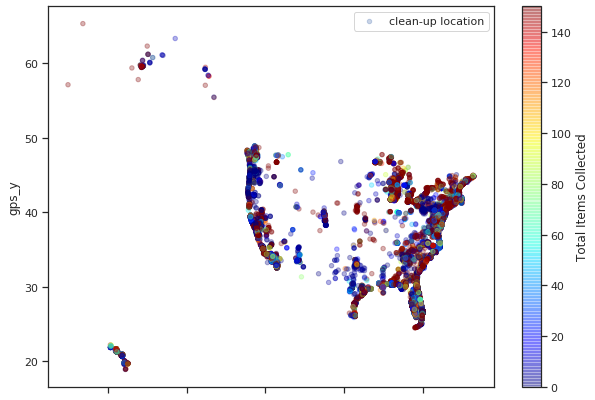

In [101]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

ocean.plot(kind="scatter", x="gps_x", y="gps_y", alpha=0.3,
            label="clean-up location", figsize=(10,7),
            c="Total Items Collected", cmap=plt.get_cmap("jet"), colorbar=True, vmax=150)
plt.legend()
plt.savefig("plots/items_collected_scatter_plot.png")
plt.show()

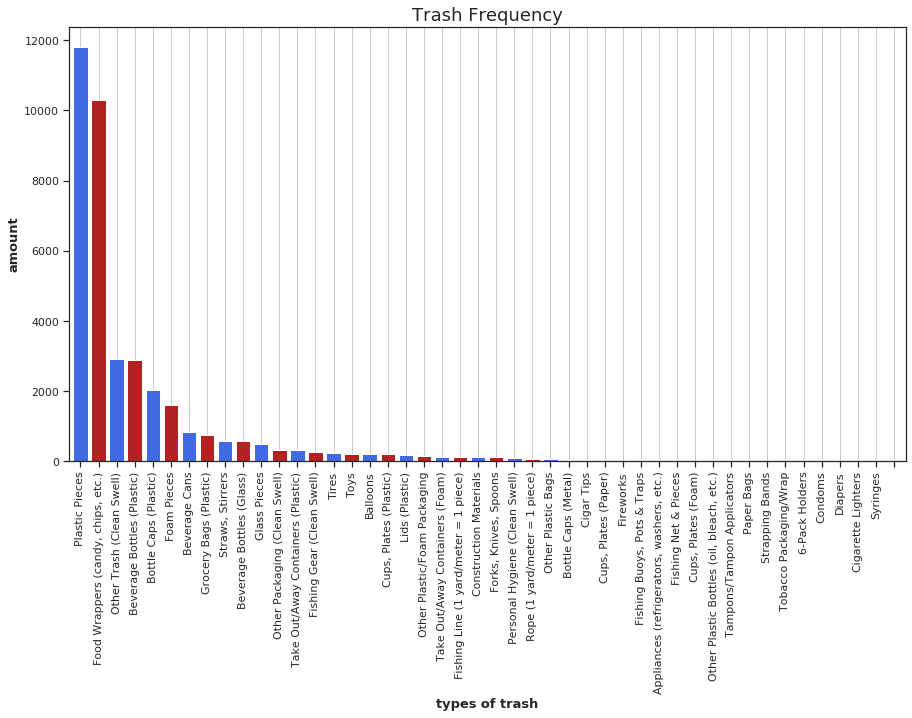

In [102]:
trash_types = ocean.loc[:, 'Cigarette Butts':'Plastic Pieces']  # isolate trash types
trash_types['Max'] = trash_types.loc[:].idxmax(axis=1)  # find most frequent trash item

cl_df = ocean.drop(ocean.loc[:,'Cigarette Butts':'Plastic Pieces'].head(0).columns, axis=1)  # separate trash classifier df
cl_df['most_freq_trash'] = trash_types['Max']

cl_df.head()
cl_df['most_freq_trash'].value_counts()

# horizantal bar plot - stacked
ax = cl_df['most_freq_trash'].value_counts().plot.bar(stacked=True, figsize=(15,8), width=0.8, color=['royalblue','firebrick'], grid=True)

# grid settings
ax.set_axisbelow(True)
ax.grid(axis='y')

# labels and title
ax.set_xlabel('types of trash', fontname='DejaVu Sans', fontsize=13, weight='bold')
ax.set_ylabel('amount', fontname='DejaVu Sans', fontsize=13, weight='bold')
ax.set_title("Trash Frequency", fontname='DejaVu Sans', fontsize=18)

# x axis tick frequency
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

# save the figure
fig = ax.get_figure()
fig.savefig("plots/trash_type_frequency.png")
fig.show()

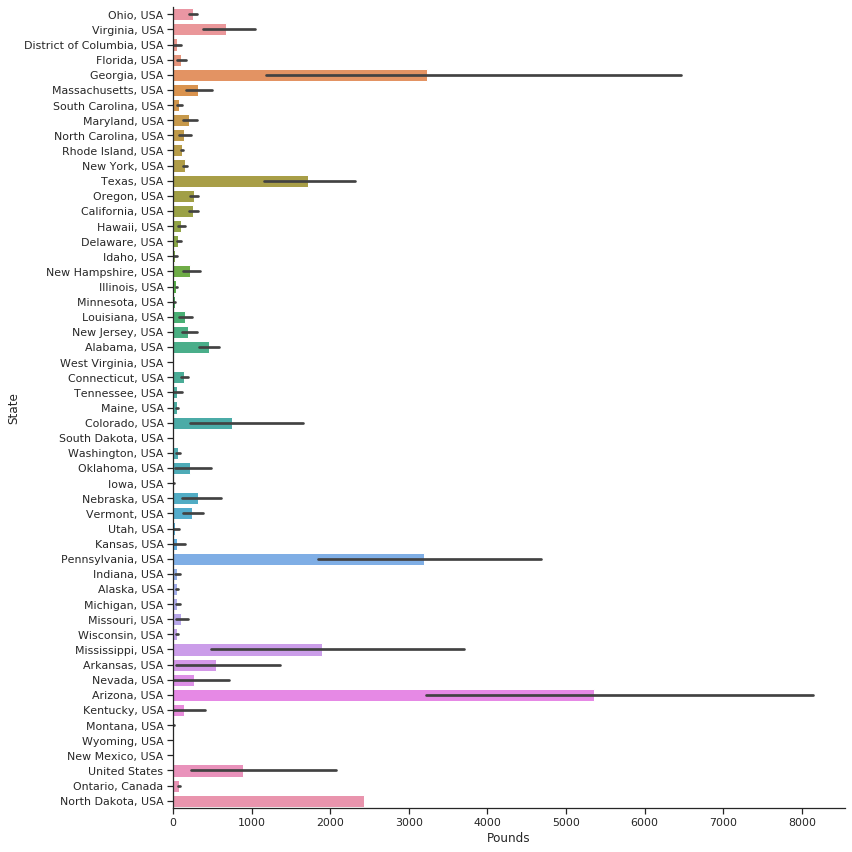

In [32]:
import seaborn as sns
sns.set(style="ticks", color_codes=True) #sns setting


plt = sns.catplot(x="Pounds", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/pounds_per_state.png")
plt

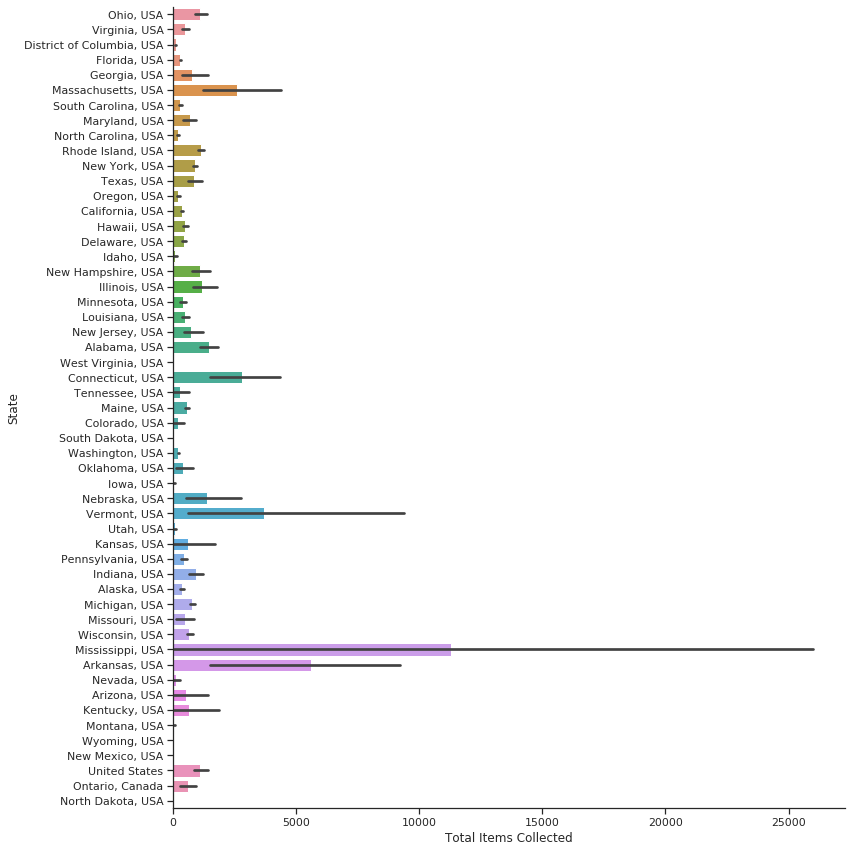

In [33]:
sns.set(style="ticks", color_codes=True) #sns setting

plt = sns.catplot(x="Total Items Collected", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/pieces_per_state.png")
plt

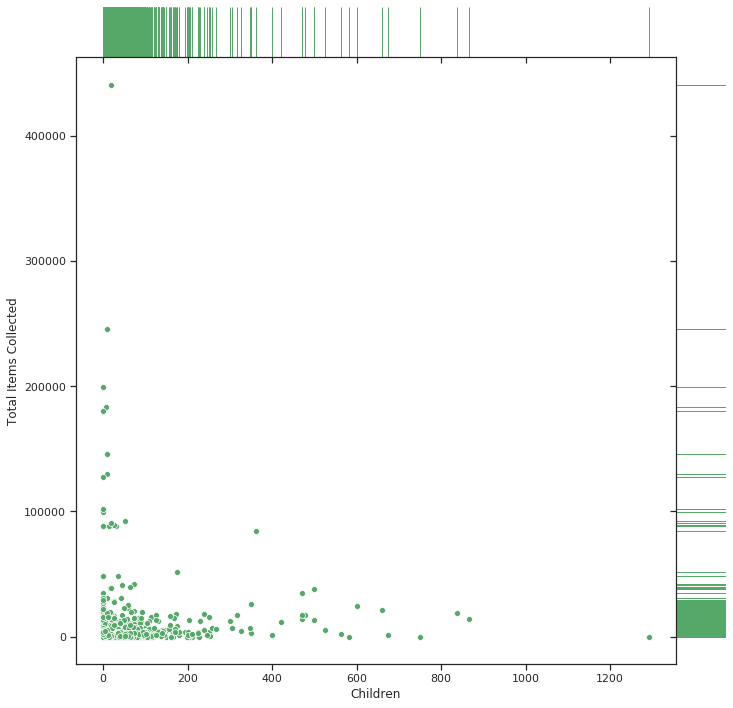

In [34]:
sns.set(style="ticks", color_codes=True) #sns setting

grid = sns.JointGrid(x="Children", y="Total Items Collected", 
                     space=0, height=6, ratio=12, size=10,
                     data=ocean)
grid.plot_joint(sns.scatterplot, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

grid.savefig("plots/pieces_per_state.png")
grid

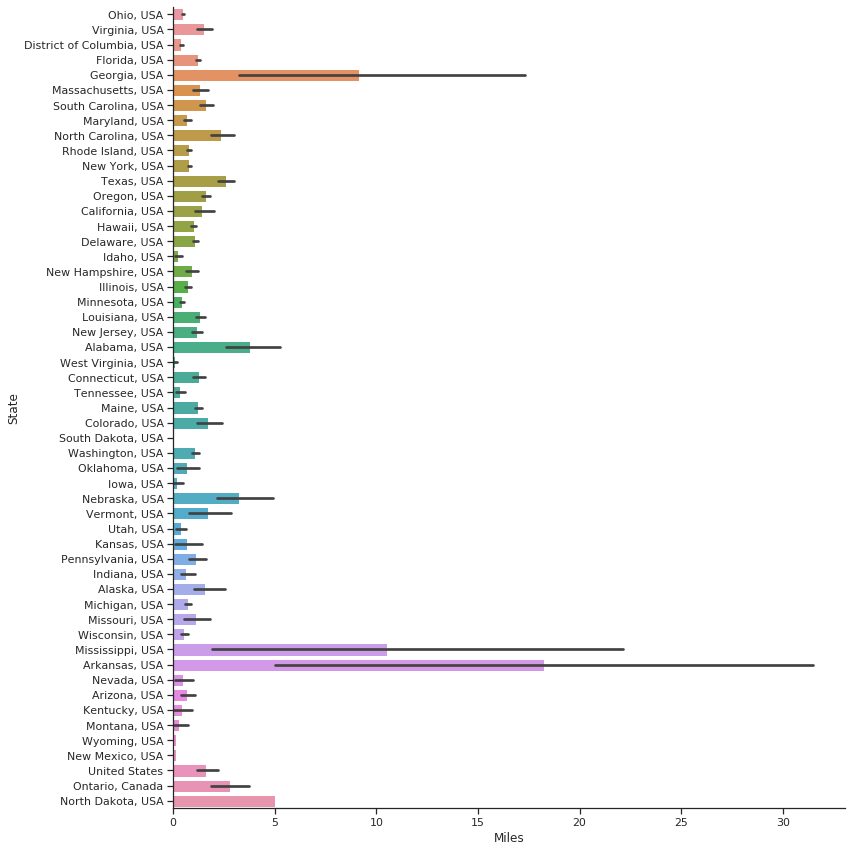

In [35]:
sns.set(style="ticks", color_codes=True) #sns setting

plt = sns.catplot(x="Miles", 
            y="State", 
            kind="bar",
            data=ocean,
            size=12);
plt.savefig("plots/miles_covered_per_state.png")
plt

## Interactive Map

In [103]:
ocean.nlargest(10, ['Pounds'])['Pounds']

28753    425025.0
24015    300656.0
15246    262500.0
15358    258470.0
5873     156000.0
7177     137840.0
27557    124000.0
5868     120000.0
7261     117552.0
27584    116500.0
Name: Pounds, dtype: float64

In [104]:
# take out 'usa' from state information
ocean[['State']] = ocean['State'].str.slice(0, -5)

In [105]:
ocean.dropna(subset=['gps_x'], inplace=True)
ocean.dropna(subset=['gps_y'], inplace=True)

In [106]:
# Change format of 'date' from mm/dd/yyyy to yyyy and rename to 'year' 
ocean['Cleanup Date_2'] = ocean['Cleanup Date'].str.split('/', n = 2, expand=False)
ocean['year'] = ocean['Cleanup Date_2'].str[2].astype('float')

ocean = ocean[ocean['year'] > 2014]
ocean = ocean[ocean['year'] < 2020]

In [107]:
ocean['Pounds'].describe()

count     37700.000000
mean        309.689288
std        4605.642345
min           0.000000
25%           1.440000
50%           5.550000
75%          24.000000
max      425025.000000
Name: Pounds, dtype: float64

In [108]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm = matplotlib.colors.Normalize(vmin=0, vmax=50, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.winter) # winter, rainbow

ocean['color'] = ocean['Pounds'].apply(lambda x: mapper.to_rgba(x))

In [109]:
ocean['color'] = ocean['color'].apply(matplotlib.colors.to_hex)

In [110]:
ocean['color'].value_counts()

#00ff80    6949
#0000ff    3938
#0001fe    1139
#0005fc     931
#0003fe     916
           ... 
#00f982       2
#00d594       2
#00ee88       2
#00e48d       2
#00ec89       1
Name: color, Length: 255, dtype: int64

Look at the outliers in the Pounds attribute:

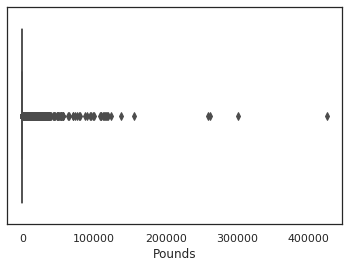

In [96]:
import seaborn as sns
sns.boxplot(x=ocean['Pounds'])

In [97]:
radius_map = []

for i in range(0,len(ocean)):
    r = ocean.iloc[i]['People'] / 100.0
    if (r > 7.0):
        r = 7.0
    if (r <= 3.0):
        r = 3.0
    radius_map.append(r)

ocean['radius'] = radius_map 

In [98]:
features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [ocean.iloc[i]['gps_x'], ocean.iloc[i]['gps_y']],
        },
        'properties': {
            'popup': "<h5>" + str(ocean.iloc[i]['Zone']) + "</h5><br>" +
                       "<p><b>Group Name: </b>" + str(ocean.iloc[i]['Group Name']) + "</p>" +
                       "<p><b>Cleanup Date: </b>" + str(ocean.iloc[i]['Cleanup Date']) + "</p>" +
                       "<p><b>Pounds Collected: </b>" + str(ocean.iloc[i]['Pounds']) + "</p>" +
                       "<p><b>People Participated: </b>" + str(int(ocean.iloc[i]['People'])) + "</p>" + 
                       "<p><b>Trash Count Per Mile: </b>" + str(ocean.iloc[i]['Total Items Collected'] / ocean.iloc[i]['Miles']) + "</p>",
            'time': ocean.iloc[i]['Cleanup Date'],
            'icon': 'circle',
            'iconstyle': {
                'fillColor': str(ocean.iloc[i]['color']),
                'color': str(ocean.iloc[i]['color']),
                'fillOpacity': 0.5,
                'stroke': 'false',
                'fill':True,
                'radius': float(ocean.iloc[i]['radius']),
                'weight':0.5,
            },
            'style': {'weight': 0.5},
            'id': 'man'
        }
    } for i in range(0,len(ocean))
]

/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/home/maksim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [99]:
# import the library
import folium
import pandas as pd
from folium import plugins
 
# Make an empty map, cartodbdark_matter , stamenterrain
map_ = folium.Map(location=[37, -102],
            max_bounds=True,
            tiles="cartodbdark_matter", 
            zoom_start=4,
            max_zoom=6, 
            min_zoom=3)



folium.plugins.TimestampedGeoJson(
            {
                'type': 'FeatureCollection',
                'features': features
            },
            period='P1D',
            add_last_point=True,
            auto_play=False,
            loop=True,
            max_speed=5,
            min_speed=1,
            loop_button=True,
            date_options='MM/DD/YYYY',
            time_slider_drag_update=True,
            duration='P1M').add_to(map_)

map_.save("map.html")
#map_

In [111]:
import folium
import branca
import json
import requests


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])
fips_codes = df[['FIPS_Code', 'Area_name']]


,FIPS_Code,Area_name
0,0,United States
1,1000,Alabama
2,1001,Autauga County
3,1003,Baldwin County
4,1005,Barbour County
...,...,...
3271,72145,Vega Baja Municipio
3272,72147,Vieques Municipio
3273,72149,Villalba Municipio
3274,72151,Yabucoa Municipio


In [112]:
county = []
for i in range(0,len(ocean)):
    c_ =  str(ocean.iloc[i]['Zone']).split(",")[0]
    county.append(c_)
len(county)

37700

In [133]:
fips_map = dict()
count = 0
for i in county:
    try:
        code_index = np.where(fips_codes["Area_name"]==i)[0][0]
        code = fips_codes.iloc[code_index]['FIPS_Code']
        
        if code in fips_map:
            fips_map[code] = fips_map[i] + ocean.iloc[count]['Pounds']
        else:
            fips_map[code] = ocean.iloc[count]['Pounds']
    except Exception as e:
        count += 1
        pass
    count += 1
len(fips_map.values())    

560

In [134]:
ocean_fips = pd.DataFrame(fips_map.items(), columns=['FIPS', 'POUNDS_TOTAL'])
ocean_fips

,FIPS,POUNDS_TOTAL
0,53000,0.63
1,12103,0.90
2,12057,0.89
3,1067,0.68
4,25009,6.81
...,...,...
555,4025,3.98
556,4009,0.73
557,16005,4.06
558,55057,1.11


In [157]:
colorscale = branca.colormap.linear.PuRd_09.scale(0, 50)
ocean_series = ocean_fips.set_index('FIPS')['POUNDS_TOTAL']
ocean_series.dropna(inplace=True)

def style_function(feature):
    p = ocean_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.9,
        'weight': 0.09,
        'fillColor': '#black' if p is None else colorscale(p)
    }

map_ = folium.Map(
    location=[48, -102],
    max_bounds=True,
    tiles="cartodbdark_matter", 
    zoom_start=4,
    max_zoom=6, 
    min_zoom=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(map_)

map_.save("map_2.html")
map_

## Look for Corelations

In [100]:
# drop unneeded attribute
ocean.drop(["Country", "gps_y", "gps_x", "year", "radius", "FIPS_Code"],
            axis=1,
            inplace=True)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imgkit
from pyvirtualdisplay import Display

display = Display(visible=0, size=(800,600))
display.start()

corr = ocean.corr()
corr_plt = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

html = corr_plt.render()
imgkit.from_string(html, 'plots/corr_table.png')

corr_plt

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


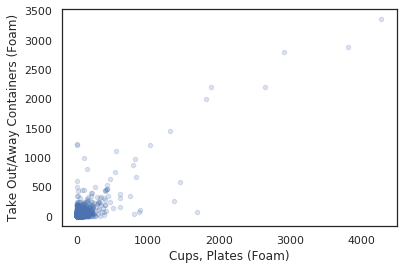

In [102]:
ocean.plot(kind="scatter", x="Cups, Plates (Foam)", y="Take Out/Away Containers (Foam)", alpha=0.2)